<b>Title</b>: Analysis of Attributes Relating to User Knowledge Levels in a DC Machine Dataset.

<b>Introduction: </b>

<li>
Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. This dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. </li> <br>

<li>
Which 2 attributes out of the ones given (within the two groups as determined by their scales) are most correlated with user knowledge level and how are those attributes correlated amongst themselves? </li>
<br>

<li> 
The User Knowledge Modeling Data Set was found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and 6 columns (5 quantitative input attributes and 1 qualitative target attribute). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: </li>

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
  </tr>
</table>



<b>Preliminary exploratory data analysis: </b>

In [1]:
library(tidyverse)
library(repr)
library(readxl)
library(GGally)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔

<li> Demonstrate that the dataset can be read from the web into R and combine 2 sheets </li>

In [2]:
user_knowledge_data1 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 2)
user_knowledge_data2 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 3)

user_knowledge_data <- rbind (user_knowledge_data1,user_knowledge_data2)
user_knowledge_data

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.080,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.060,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.100,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.080,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.150,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.100,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.020,0.34,0.40,0.01,very_low,NA,NA,NA
0.20,0.140,0.35,0.72,0.25,Low,NA,NA,NA


<li> Demonstrate the cleaning and wrangling of the data into a tidy format </li>

In [3]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
user_knowledge_data_selected

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


<li> Randomize the dataset </li>

In [4]:
user_knowledge_data_randomized <- slice(user_knowledge_data_selected, sample(1:n()))
user_knowledge_data_randomized


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.460,0.200,0.76,0.95,0.65,High
0.170,0.360,0.80,0.14,0.66,Middle
0.160,0.510,0.09,0.38,0.10,Very Low
0.710,0.460,0.95,0.78,0.86,High
0.520,0.850,0.06,0.27,0.25,Low
0.345,0.299,0.10,0.64,0.13,Low
0.315,0.690,0.28,0.80,0.70,High
0.610,0.780,0.69,0.92,0.58,High
0.230,0.290,0.45,0.18,0.88,High


<li> Split the dataset into training and testing data </li>

In [5]:
knowledge_data_split <- initial_split(user_knowledge_data_randomized, prop = 0.75, strata = UNS )
knowledge_data_training <- training(knowledge_data_split)   
knowledge_data_testing <- testing(knowledge_data_split)   

knowledge_data_training
knowledge_data_testing



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.460,0.20,0.76,0.95,0.65,High
0.170,0.36,0.80,0.14,0.66,Middle
0.160,0.51,0.09,0.38,0.10,Very Low
0.710,0.46,0.95,0.78,0.86,High
0.315,0.69,0.28,0.80,0.70,High
0.230,0.29,0.45,0.18,0.88,High
0.060,0.50,0.09,0.28,0.25,Low
0.270,0.29,0.34,0.28,0.32,Low
0.210,0.78,0.42,0.32,0.84,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.520,0.850,0.06,0.27,0.25,Low
0.345,0.299,0.10,0.64,0.13,Low
0.610,0.780,0.69,0.92,0.58,High
0.290,0.660,0.35,0.28,0.31,Low
0.200,0.490,0.68,0.76,0.78,High
0.295,0.250,0.73,0.77,0.19,Low
0.770,0.267,0.59,0.78,0.28,Middle
0.330,0.040,0.02,0.12,0.11,Very Low
0.730,0.200,0.07,0.72,0.26,Low


<li> Summarize the training data based on the total count of observations and the average of each attribute </li>

In [6]:
user_knowledge_data_summarize <- knowledge_data_training %>% 
summarize(Count = n(), Average_STG = mean(STG), Average_SCG = mean(SCG), Average_STR = mean(STR), Average_LPR = mean(LPR), Average_PEG = mean(PEG))
user_knowledge_data_summarize

Count,Average_STG,Average_SCG,Average_STR,Average_LPR,Average_PEG
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
303,0.3428779,0.3449901,0.475132,0.4275941,0.4547294


<li> Visualize the training data using 5 different box plots </li>

`summarise()` ungrouping output (override with `.groups` argument)



UNS,Average_STG,Average_SCG,Average_STR,Average_LPR,Average_PEG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,0.4092632,0.4220526,0.5074342,0.5467105,0.80960526
Low,0.3185158,0.2917789,0.4494737,0.4348421,0.26129474
Middle,0.3500000,0.3714667,0.5163333,0.3906667,0.52911111
Very Low,0.2347619,0.3428571,0.3814286,0.1938571,0.09809524
very_low,0.2904286,0.1954762,0.3914286,0.3557143,0.08333333


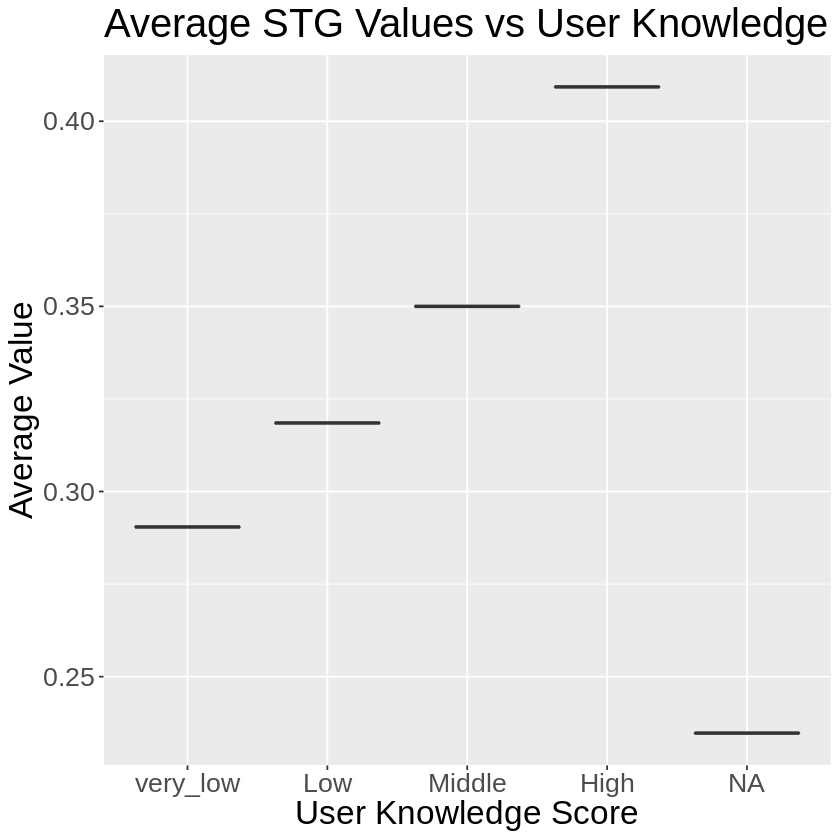

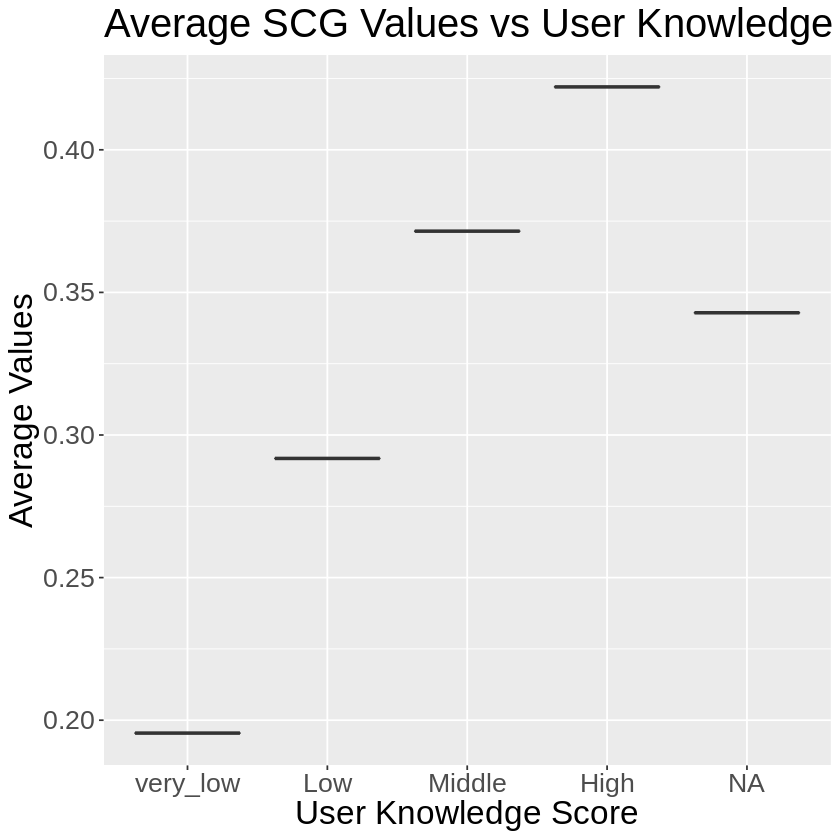

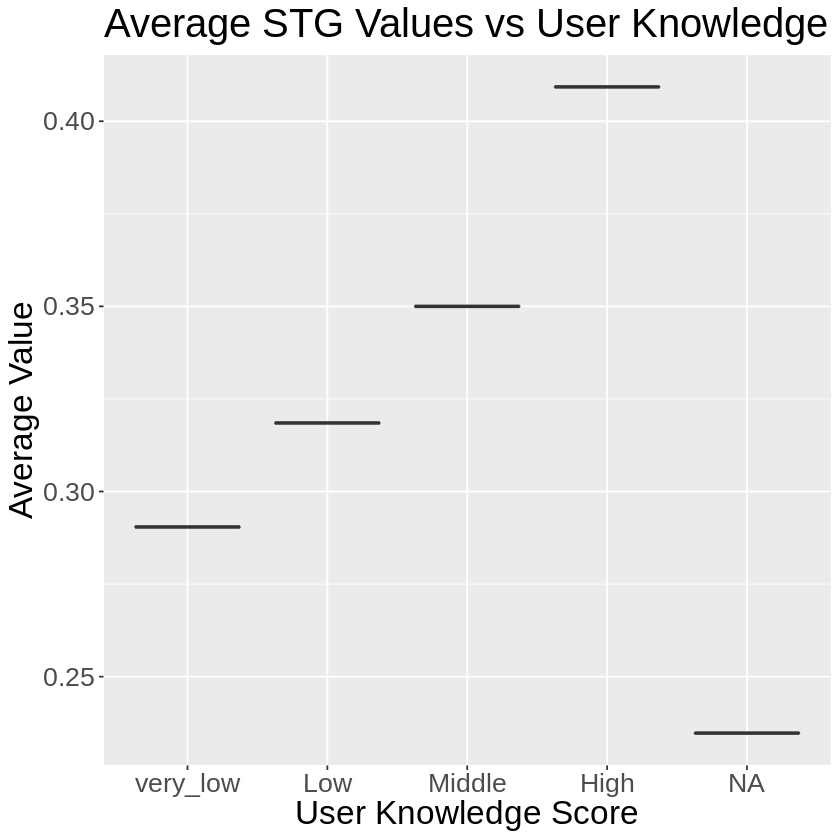

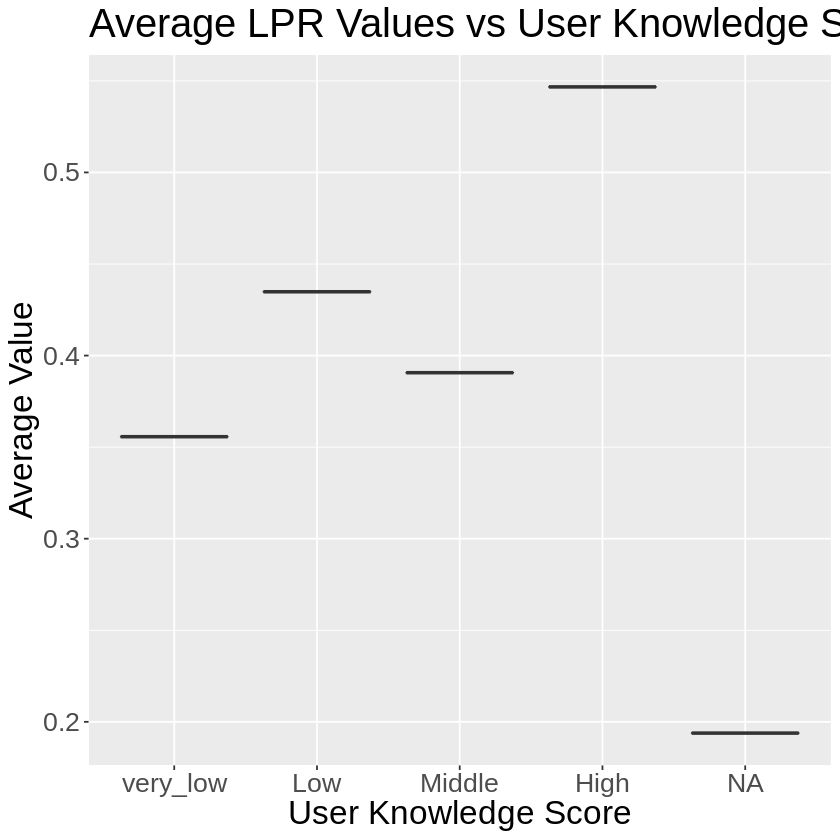

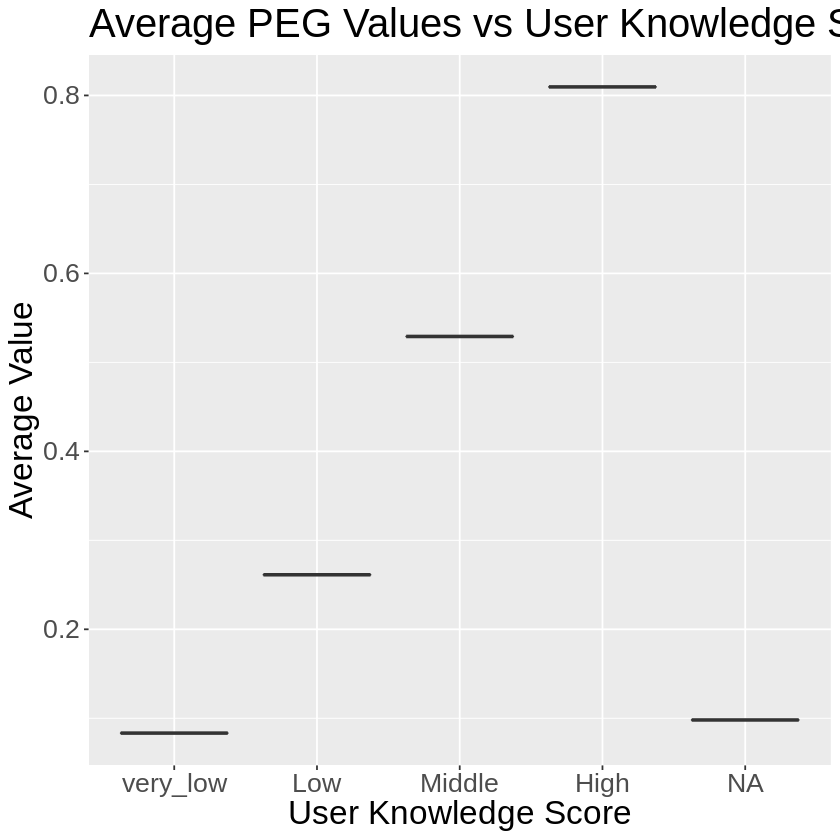

In [7]:
user_knowledge_data_average <- knowledge_data_training %>%     
    group_by(UNS) %>% 
    summarize(Average_STG = mean(STG), Average_SCG = mean(SCG), Average_STR = mean(STR), Average_LPR = mean(LPR), Average_PEG = mean(PEG))
user_knowledge_data_average

Average_STG_frame <- select(user_knowledge_data_average, Average_STG, UNS)
Average_STG_frame$UNS <- factor(Average_STG_frame$UNS, levels = c("very_low", "Low", "Middle", "High"))
Average_STG_box_plot <- ggplot(Average_STG_frame, aes(x = UNS, y = Average_STG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Average Value", title= "Average STG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
Average_STG_box_plot

Average_SCG_frame <- select(user_knowledge_data_average, Average_SCG, UNS)
Average_SCG_frame$UNS <- factor(Average_SCG_frame$UNS, levels = c("very_low", "Low", "Middle", "High"))
Average_SCG_box_plot <- ggplot(Average_SCG_frame, aes(x = UNS, y = Average_SCG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Average Values", title= "Average SCG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
Average_SCG_box_plot

Average_STR_frame <- select(user_knowledge_data_average, Average_STR, UNS)
Average_STR_frame$UNS <- factor(Average_STR_frame$UNS, levels = c("very_low", "Low", "Middle", "High"))
Average_STR_box_plot <- ggplot(Average_STR_frame, aes(x = UNS, y = Average_STR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Average Values", title= "Average STR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
Average_STG_box_plot

Average_LPR_frame <- select(user_knowledge_data_average, Average_LPR, UNS)
Average_LPR_frame$UNS <- factor(Average_LPR_frame$UNS, levels = c("very_low", "Low", "Middle", "High"))
Average_LPR_box_plot <- ggplot(Average_LPR_frame, aes(x = UNS, y = Average_LPR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Average Value", title= "Average LPR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
Average_LPR_box_plot

Average_PEG_frame <- select(user_knowledge_data_average, Average_PEG, UNS)
Average_PEG_frame$UNS <- factor(Average_PEG_frame$UNS, levels = c("very_low", "Low", "Middle", "High"))
Average_PEG_box_plot <- ggplot(Average_PEG_frame, aes(x = UNS, y = Average_PEG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Average Value", title= "Average PEG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
Average_PEG_box_plot




In [8]:
#options(repr.plot.width = 20, repr.plot.height = 10) 
#user_knowledge_g1_plot <- ggplot (pivot_longer_g1, aes(x= UNS, y= Sum_Values, fill= Attributes)) + 
#                          geom_bar(stat = "identity", position = "dodge") +
#                          labs(x = "User Knowledge Score", y = "Sum Values", fill = "Attributes", title= "Sum of Values vs User Knowledge Score (Group 1)") + 
#                          theme(text = element_text(size = 20)) 

#user_knowledge_g1_plot

#user_knowledge_g2_plot <- ggplot (pivot_longer_g2, aes(x= UNS, y= Sum_Values, fill= Attributes)) + 
#                          geom_bar(stat = "identity", position = "dodge") +
#                          labs(x = "User Knowledge Score", y = "Sum Values", fill = "Attributes", title = "Sum of Values vs User Knowledge Score (Group 2)") + 
#                         theme(text = element_text(size = 20)) 

#user_knowledge_g2_plot

ERROR: Error in ggplot(pivot_longer_g1, aes(x = UNS, y = Sum_Values, fill = Attributes)): object 'pivot_longer_g1' not found


<b> Methods: </b>

<li> 2 grouped bar plots will be created, user_knowledge_g1_plot for STG, SCG, STR and user_knowledge_g2_plot for LPR and PEG graphs. This is because the two groups use a different scale between them. The plots will have the sum of the attribute values on the y-axis and the 4 knowledge levels of users (UNS) on the x-axis. Each colored bar corresponds to one attribute. The bar heights of the attributes within the high and middle knowledge levels will be compared to visually evaluate and select for 1 attribute from each group (1 from STG, SCG, and STR, and 1 from LPR and PEG) that appears most closely linked to the two chosen knowledge levels, in the form of having the highest column heights in those two categories. </li>
<br>


<li> A scatter plot to compare these two identified attributes will be made and the correlation strength and direction will be visually evaluated. </li>




<br><br>
<b>Expected Outcomes and Significance: </b>

<li> 
We expect to find two attributes that are the closest linked to the middle and high knowledge levels and the correlation between the two implicated attributes. </li> <br>

<li> 
The findings could be used to devise learning strategies, within the field of electrical DC machines, that would prioritize the selected attributes to maximize user knowledge levels in a given period of time.
</li> <br>

<li> Future Questions </li>
- Is the result consistent over similar domains of knowledge and technical fields? <br>
- What factors make the attribute closest linked to user knowledge level as such? <br>
- What attributes are the least linked and why? <br>
- What are the patterns in how different combinations of attributes affect knowledge level? <br>




<br><br><b>References: </b>

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)



Group 002-08: Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe